In [11]:
import pandas as pd
from datetime import datetime

In [12]:
df = pd.read_csv('./data/Temperatura_EC.txt', sep='\t')
df

,Dia,Mes,Año,Hora,BCAA_T,FREI_T,KOREA_T
0,23,2,1999,0,4.40,4.3,5.5
1,23,2,1999,6,3.30,2.2,3.2
2,23,2,1999,12,3.30,2.1,3.6
3,23,2,1999,18,5.00,2.9,3.6
4,24,2,1999,0,2.80,2.5,2.6
...,...,...,...,...,...,...,...
439,9,8,2005,18,-0.40,-0.3,-1.0
440,10,8,2005,0,-0.35,0.1,-0.8
441,10,8,2005,6,-1.00,-0.8,-1.6
442,10,8,2005,12,-0.20,-1.0,0.7


In [13]:
datetime_for = []
for i in df.index:
    datetime_for.append(datetime(df['Año'][i], df['Mes'][i], df['Dia'][i], df['Hora'][i], 0))
    

In [14]:
df.index = datetime_for

In [15]:
df_day = df[['BCAA_T', 'FREI_T', 'KOREA_T']].resample('1d').mean().dropna()

In [16]:
df_day.index.name = 'date'
df_day

,BCAA_T,FREI_T,KOREA_T
date,,,
1999-02-23,4.0000,2.875,3.975
1999-02-24,3.3125,2.575,3.800
1999-02-25,3.2000,2.175,3.700
1999-03-18,3.8750,2.575,3.400
1999-03-19,2.9750,2.200,3.750
...,...,...,...
2005-02-11,3.2500,3.250,3.050
2005-02-12,3.0750,3.200,2.500
2005-08-08,-0.6125,-0.725,-0.950


In [17]:
df_day.to_csv('data/EC_day.csv', sep='\t')

In [18]:
len(df_day.index)

111

<Axes: xlabel='date'>

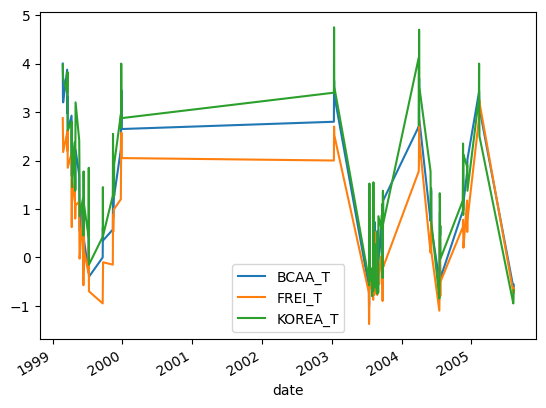

In [19]:
df_day.plot()